#LGMVIP Data Science Internship

Author : Rushikesh Bobade

Beginner Level Task 2 : Stock Market Prediction And Forecasting Using Stacked LSTM

Language : Python 

**Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

**Import Dataset**

In [ ]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
dataset=pd.read_csv(url)
dataset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


**Describing the Data**

In [ ]:
dataset.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [ ]:
dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


**Data Visualization**

<function matplotlib.pyplot.show>

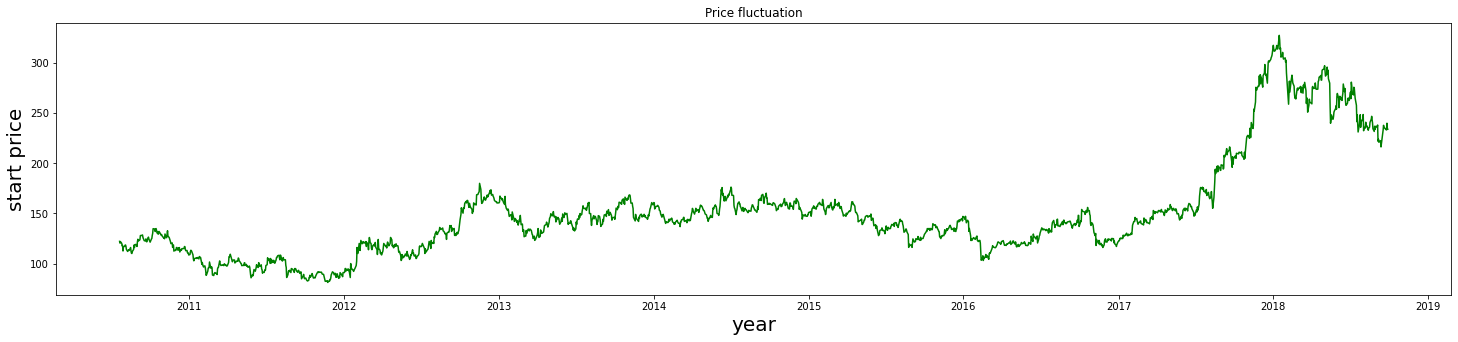

In [ ]:
dataset["Date"] = pd.to_datetime(dataset.Date)
dataset.index = dataset['Date']
plt.figure(figsize=(25, 5))
plt.title('Price fluctuation')
ds_open = dataset['Open']
plt.plot(ds_open, color='green')
plt.xlabel('year', fontsize=20)
plt.ylabel('start price', fontsize=20)
plt.show

<function matplotlib.pyplot.show>

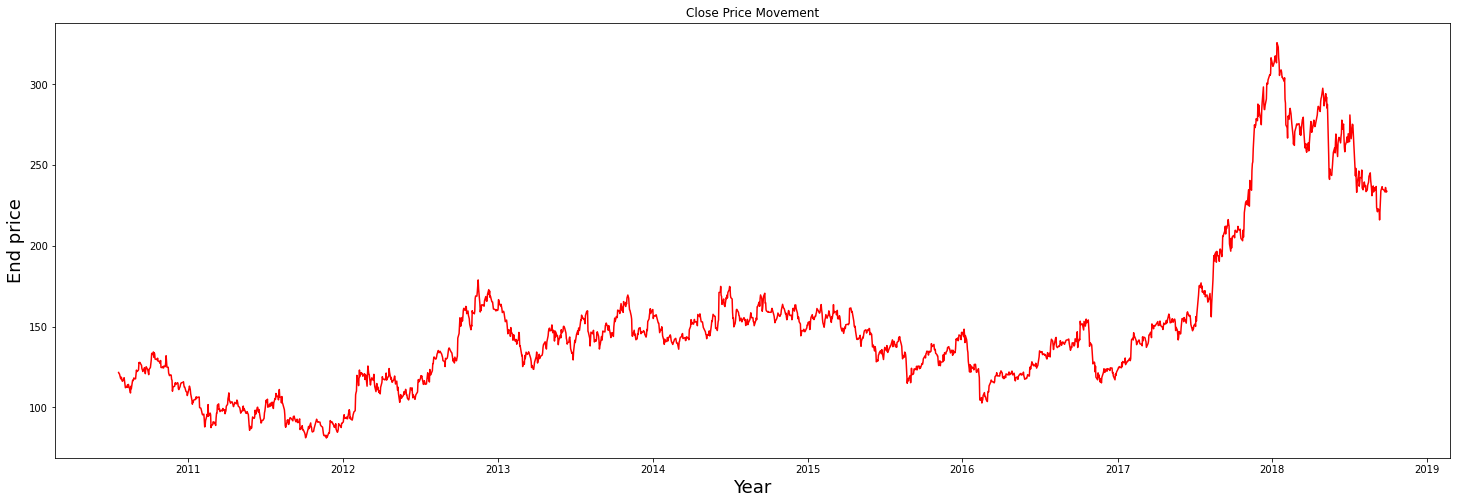

In [ ]:
dataset["Date"] = pd.to_datetime(dataset.Date)
dataset.index = dataset['Date']
plt.figure(figsize=(25, 8))
plt.title('Close Price Movement')
ds_close = dataset['Close']
plt.plot(ds_close, color='red')
plt.xlabel('Year', fontsize=18)
plt.ylabel('End price', fontsize=18)
plt.show

(array([248., 483., 705., 318.,  18.,  43.,  61.,  71.,  62.,  26.]),
 array([ 82.8  , 107.395, 131.99 , 156.585, 181.18 , 205.775, 230.37 ,
        254.965, 279.56 , 304.155, 328.75 ]),
 <a list of 10 Patch objects>)

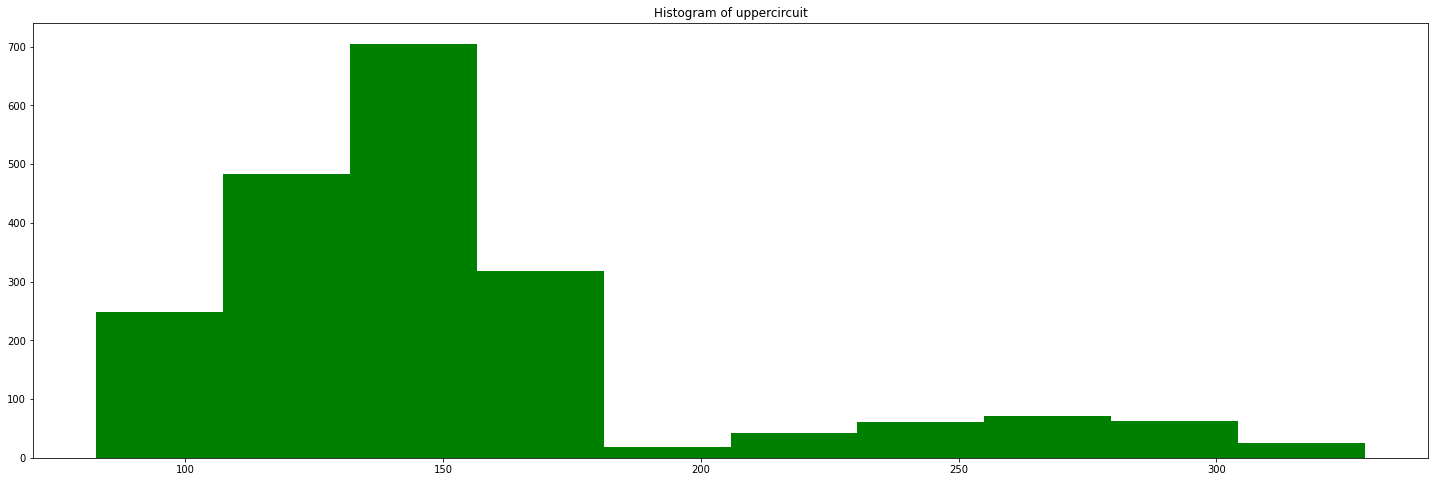

In [ ]:
plt.figure(figsize=(25, 8))
plt.title('Histogram of uppercircuit')
plt.hist(dataset['High'], color = "green")

**Scaling the close value**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
ds_close=scaler.fit_transform(np.array(ds_close).reshape(-1,1))
ds_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

**Splitting into Training and Testing data**

In [ ]:
training_size=int(len(ds_close)*0.72)
test_size=len(ds_close)-training_size
train_data=ds_close[0:training_size,:]
test_data=ds_close[training_size:len(ds_close),:1]

**Data Preprocessing**

In [ ]:
def create_dataset(dataset, time_step=1):
    x_data= []
    y_data= []
    for i in range(len(dataset)-time_step-1):
      x_data.append(dataset[i:(i+time_step), 0])
      y_data.append(dataset[i + time_step, 0])
      return np.array(x_data), np.array(y_data)

In [ ]:
time_step = 100
x_train,y_train = create_dataset(train_data, time_step)
x_test, y_test= create_dataset(test_data, time_step)

In [ ]:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
x_train.shape


(1, 100, 1)

In [ ]:
y_train.shape


(1,)

**Building the LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
regressor=Sequential()

regressor.add(LSTM(units=50,return_sequences=True,input_shape=(100,1)))

regressor.add(LSTM(units=50,return_sequences=True))

regressor.add(LSTM(units=50))

regressor.add(Dense(1))

In [ ]:
regressor.compile(loss='mean_squared_error',optimizer='adam')
regressor.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.6626 - val_loss: 0.0033
Epoch 2/100
1/1 [==============================] - 0s 98ms/step - loss: 0.5245 - val_loss: 5.6846e-04
Epoch 3/100
1/1 [==============================] - 0s 94ms/step - loss: 0.3873 - val_loss: 2.6853e-04
Epoch 4/100
1/1 [==============================] - 0s 89ms/step - loss: 0.2493 - val_loss: 0.0044
Epoch 5/100
1/1 [==============================] - 0s 93ms/step - loss: 0.1191 - val_loss: 0.0173
Epoch 6/100
1/1 [==============================] - 0s 104ms/step - loss: 0.0216 - val_loss: 0.0462
Epoch 7/100
1/1 [==============================] - 0s 97ms/step - loss: 0.0101 - val_loss: 0.0839
Epoch 8/100
1/1 [==============================] - 0s 95ms/step - loss: 0.0888 - val_loss: 0.0949
Epoch 9/100
1/1 [==============================] - 0s 95ms/step - loss: 0.1012 - val_loss: 0.0834
Epoch 10/100
1/1 [==============================] - 0s 254ms/step - loss: 0.0590 - val_loss: 0.0647
Epoch 11/10

**Prediction of Data**

In [ ]:
train_predict=regressor.predict(x_train)
test_predict=regressor.predict(x_test)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train ,train_predict))

293.6986744201261

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))


173.35011271557778

In [ ]:
look_back = 100
train_predict_plot = np.empty_like(ds_close)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict)+look_back, :] = train_predict

In [ ]:
test_predict_plot = np.empty_like(ds_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict)+(look_back*2)+1:len(ds_close)-1, :] = test_predict

**Plotting Results**

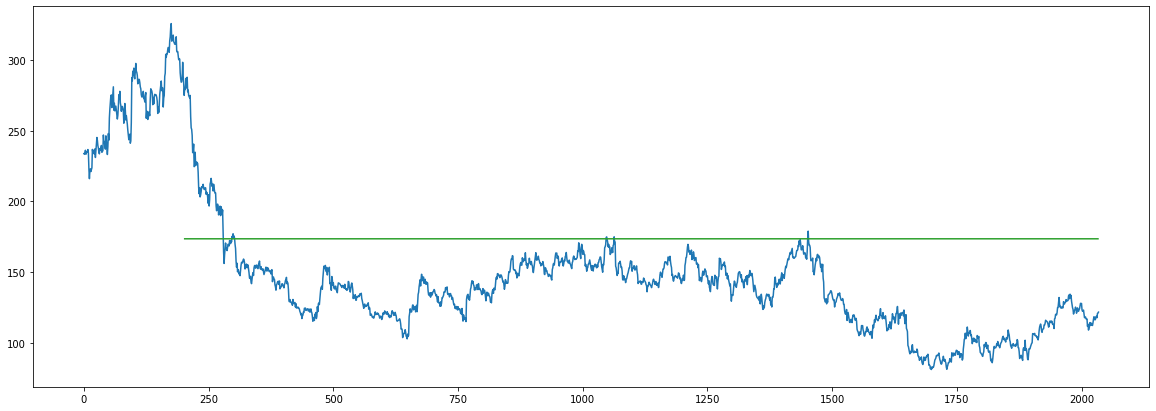

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(scaler.inverse_transform(ds_close))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

In [ ]:
len(test_data), x_test.shape


(570, (1, 100, 1))

In [ ]:
x_input = test_data[470:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
tem_input = list(x_input)
tem_input = tem_input[0].tolist()



```
# This is formatted as code
```

**Prediction for Next 50 Days**

In [ ]:
lt_output=[]
n_steps=100
next_No_Of_Days = 50
i=0

while(i<next_No_Of_Days):
    
        if(len(tem_input)>100):
           x_input=np.array(tem_input[1:])
           print("{} day input {}".format(i,x_input))
           x_input=x_input.reshape(1,-1)
           x_input = x_input.reshape((1, n_steps, 1))
           yt = regressor.predict(x_input, verbose=0)
           print("{} day output {}".format(i,yt))
           tem_input.extend(yt[0].tolist())
           tem_input=tem_input[1:]
           lt_output.extend(yt.tolist())
           i=i+1
        else:
           x_input = x_input.reshape((1, n_steps,1))
           yt = regressor.predict(x_input, verbose=0)
           print(yt[0])
           tem_input.extend(yt[0].tolist())
           print(len(tem_input))
           lt_output.extend(yt.tolist())
           i=i+1
    
print(lt_output)

[0.3974085]
101
1 day input [0.13848039 0.14011438 0.13888889 0.13541667 0.14011438 0.1380719
 0.13071895 0.13071895 0.12867647 0.11846405 0.14644608 0.14808007
 0.15910948 0.15992647 0.15788399 0.16441993 0.17892157 0.17933007
 0.19260621 0.20812908 0.18974673 0.18055556 0.18239379 0.17708333
 0.17810458 0.18055556 0.17810458 0.17851307 0.19607843 0.18913399
 0.18954248 0.19403595 0.19444444 0.20200163 0.19771242 0.19934641
 0.19873366 0.1997549  0.2128268  0.21568627 0.20445261 0.21772876
 0.21098856 0.21425654 0.19750817 0.18811275 0.17851307 0.17381536
 0.16033497 0.16564542 0.17116013 0.17422386 0.18035131 0.17401961
 0.16278595 0.16973039 0.17810458 0.17034314 0.16830065 0.17279412
 0.17544935 0.18382353 0.19138072 0.18913399 0.19097222 0.17238562
 0.16830065 0.1693219  0.17177288 0.16156046 0.14971405 0.1503268
 0.15196078 0.14726307 0.14501634 0.14603758 0.12479575 0.13112745
 0.11397059 0.1190768  0.12377451 0.13562092 0.12908497 0.13459967
 0.12806373 0.13031046 0.12724673 0.

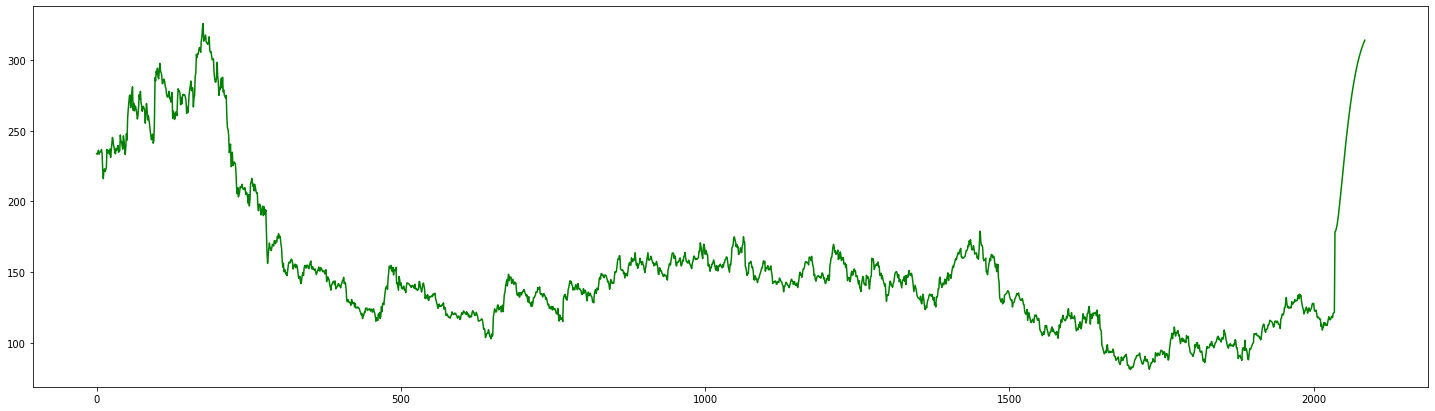

In [ ]:
df = ds_close.tolist()
df.extend(lt_output)
df=scaler.inverse_transform(df).tolist()
plt.figure(figsize=(25, 7))
plt.plot(df, color = "green")

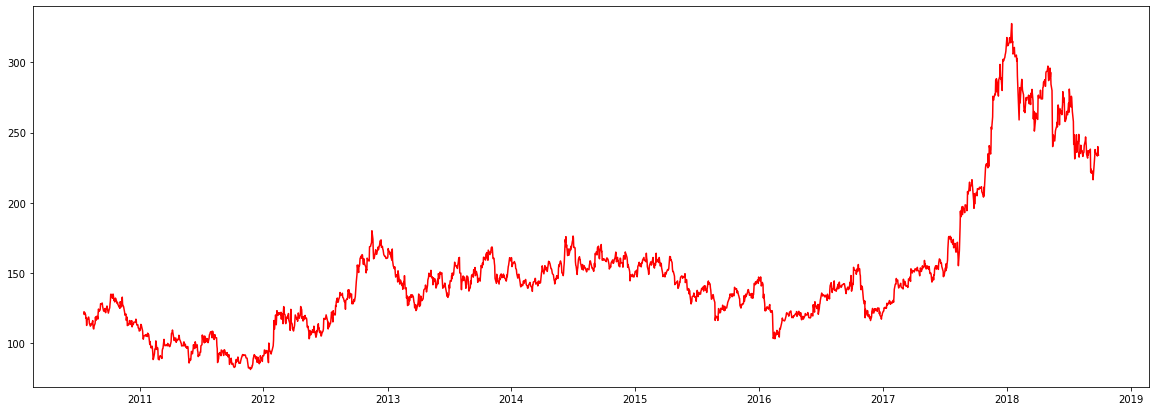

In [ ]:
dataset["Date"] = pd.to_datetime(dataset.Date)
dataset.index = dataset['Date']

plt.figure(figsize=(20, 7))
plt.plot(dataset["Open"], label='ClosePriceHist', color = "red")

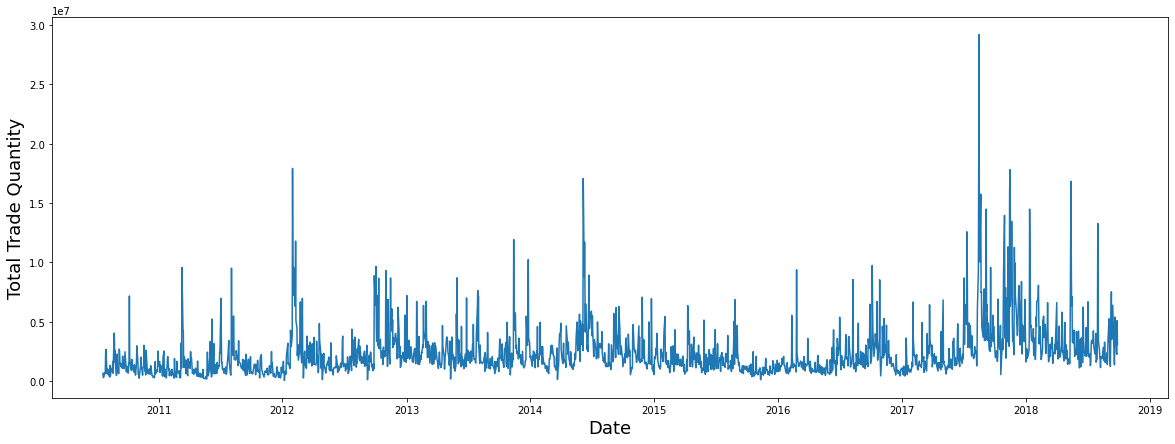

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(dataset['Total Trade Quantity'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

In [ ]:
Thank youu
